## Download Dataset from Kaggle Using Opendatasets

In [1]:
import opendatasets as od
import os

In [2]:
dataset_url = 'https://www.kaggle.com/ionaskel/laptop-prices'
od.download(dataset_url)

Skipping, found downloaded files in ".\laptop-prices" (use force=True to force download)


In [3]:
data_dir = './laptop-prices'
os.listdir(data_dir)

['laptops.csv']

In [4]:
train_csv = data_dir + '/laptops.csv'

In [5]:
# Libraries for data preprocessing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Read the data through pandas 
df = pd.read_csv(train_csv, encoding='ISO-8859-1')
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [7]:
# Check the shape of the dataframe
df.shape

(1303, 13)

In [8]:
# Check the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [9]:
# Check if the data has null values or not 
df.isnull().sum()

Unnamed: 0          0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [10]:
# Check the statistical measures
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1303.0,660.155794,381.172104,1.0,331.5,659.0,990.50,1320.0
Inches,1303.0,15.017191,1.426304,10.1,14.0,15.6,15.60,18.4
Price_euros,1303.0,1123.686992,699.009043,174.0,599.0,977.0,1487.88,6099.0


In [11]:
# Check the Correlation
df.corr(method='pearson')

,Unnamed: 0,Inches,Price_euros
Unnamed: 0,1.000000,-0.087796,0.067830
Inches,-0.087796,1.000000,0.068197
Price_euros,0.067830,0.068197,1.000000


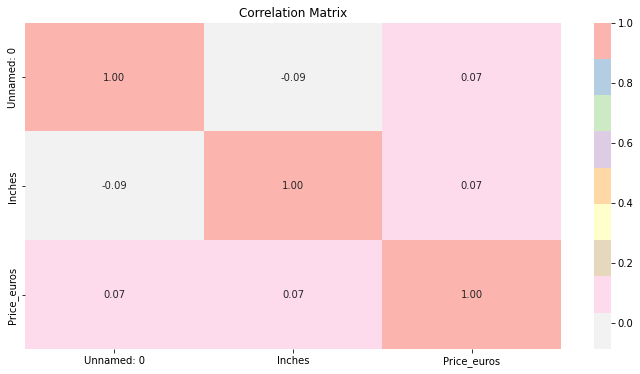

In [12]:
# Correlation Heatmap
plt.figure(figsize=(12,6))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(method='pearson'), 
            annot=True, 
            cbar=True, 
            cmap='Pastel1_r', 
            fmt='.2f');

In [13]:
# Drop the unnecessary colummns
df.drop(columns=['Unnamed: 0', 'Product'], axis=1, inplace=True)

In [14]:
# Checks the first 5rows
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [15]:
# Replace the string with empty string
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [16]:
# Set the datatype as int32
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price_euros       1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## EDA

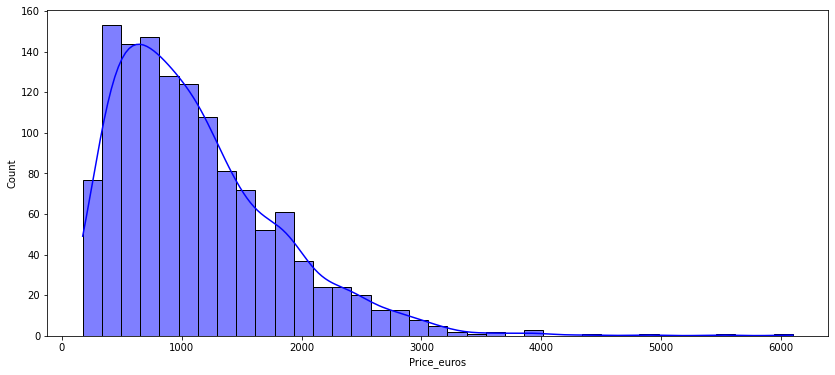

In [17]:
plt.figure(figsize=(14,6))
sns.histplot(df['Price_euros'], 
             legend=False, 
             kde=True, 
             color='blue');

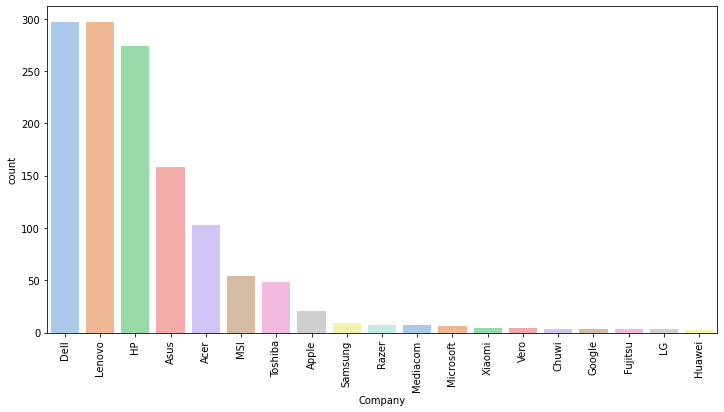

In [18]:
df['Company'].value_counts()
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(data=df, x=df['Company'], 
              palette='pastel', 
              order=df['Company'].value_counts().index);

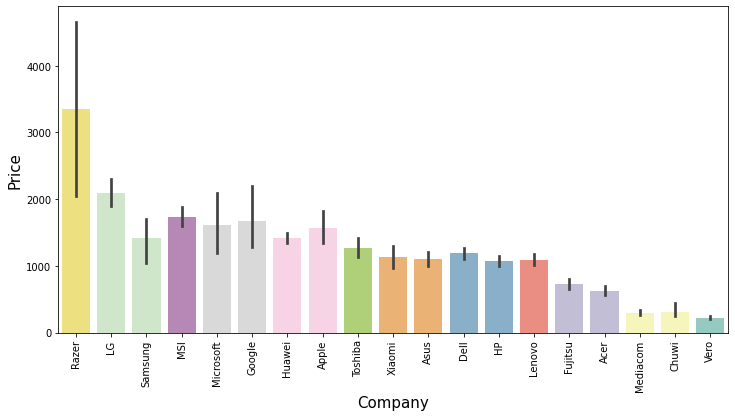

In [19]:
sort_result = df.groupby(["Company"])['Price_euros'].median().reset_index().sort_values('Price_euros', ascending=False)
df.sort_values('Price_euros')
plt.figure(figsize=(12,6))
sns.barplot(x='Company', y='Price_euros', 
            data=df, palette='Set3_r', 
            order=sort_result['Company'])
plt.xticks(rotation=90)
plt.xlabel('Company', size=15)
plt.ylabel('Price', size=15)
plt.show();

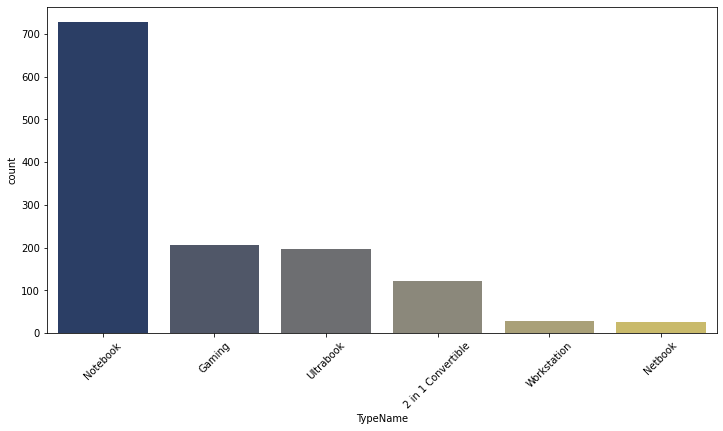

In [20]:
df['TypeName'].value_counts()
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.countplot(data=df, x=df['TypeName'], 
              palette='cividis', 
              order=df['TypeName'].value_counts().index);

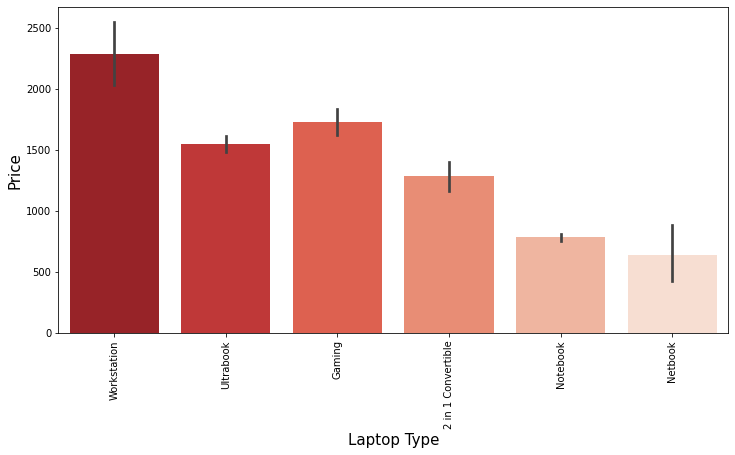

In [21]:
result = df.groupby(["TypeName"])['Price_euros'].median().reset_index().sort_values('Price_euros', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=df['TypeName'], 
            y=df['Price_euros'], 
            palette='Reds_r', 
            order=result['TypeName'])
plt.xticks(rotation='vertical')
plt.xlabel('Laptop Type', size=15)
plt.ylabel('Price', size=15)
plt.show();

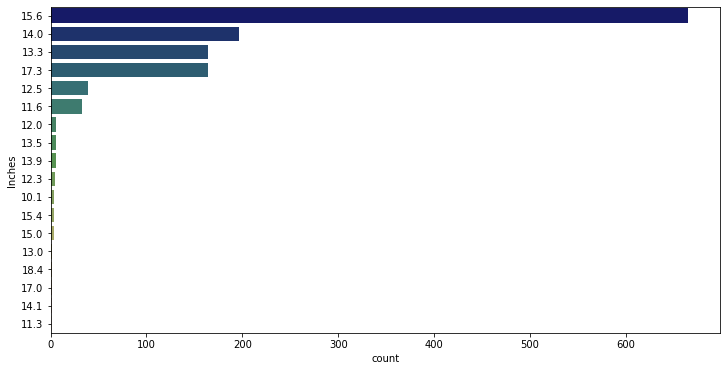

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(y=df['Inches'], 
              data=df, 
              palette='gist_earth', 
              order=df['Inches'].value_counts().index);

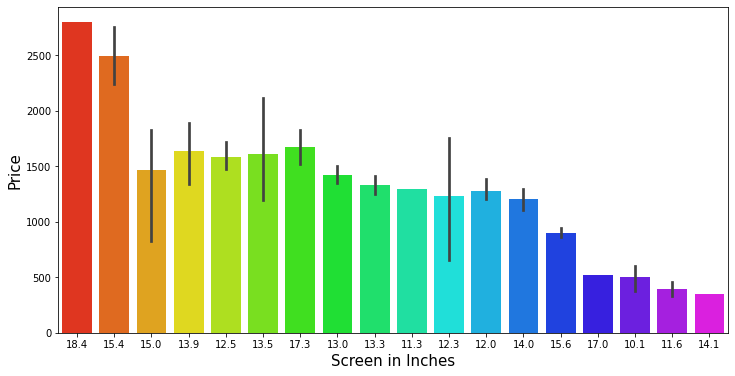

In [23]:
sort_bars = df.groupby(['Inches'])['Price_euros'].median().reset_index().sort_values('Price_euros', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=df['Inches'], 
            y=df['Price_euros'], 
            order=sort_bars['Inches'],
            palette='gist_rainbow')
plt.xlabel('Screen in Inches', size=15)
plt.ylabel('Price', size=15)
plt.show();

In [24]:
# check the count of the screen resolution column
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [25]:
# Create a new column touchscreen
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
549,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.99,1729.0,0
467,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,2TB HDD,AMD Radeon 530,Windows 10,2.02,759.0,0
72,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,870.0,0
741,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.00,665.0,0
931,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.26,1579.0,0


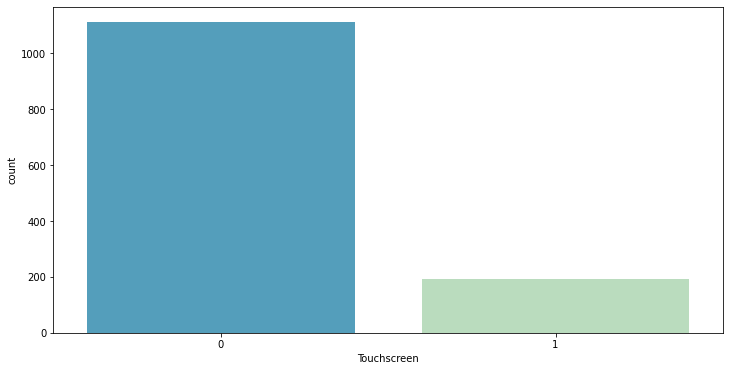

In [26]:
df['Touchscreen'].value_counts()
plt.figure(figsize=(12,6))
sns.countplot(x=df['Touchscreen'], 
              data=df, 
              palette='GnBu_r');

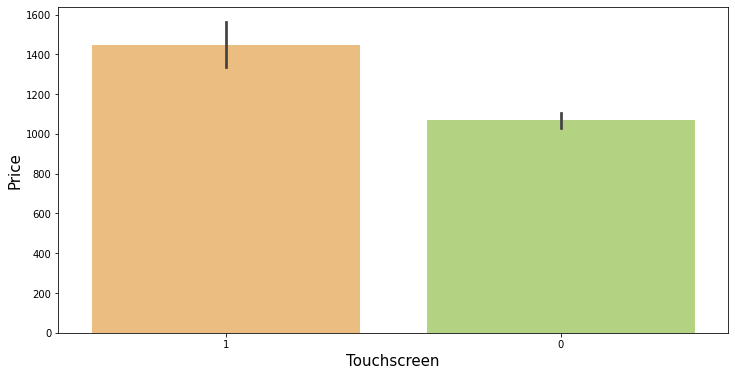

In [27]:
sort_bar = df.groupby(['Touchscreen'])['Price_euros'].median().reset_index().sort_values(['Price_euros'], ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=df['Touchscreen'], 
            y=df['Price_euros'],
            data=df,
            palette='RdYlGn', 
            order=sort_bar['Touchscreen'])
plt.xlabel('Touchscreen', size=15)
plt.ylabel('Price', size=15)
plt.show();

In [28]:
# Create a new column Ips
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips
818,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.36,2505.02,0,1


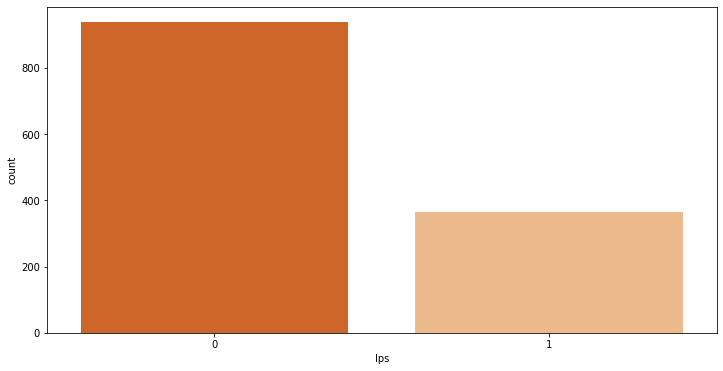

In [29]:
df['Ips'].value_counts()
plt.figure(figsize=(12,6))
plt.xticks(rotation='horizontal')
sns.countplot(x=df['Ips'], 
              data=df, 
              palette='Oranges_r');

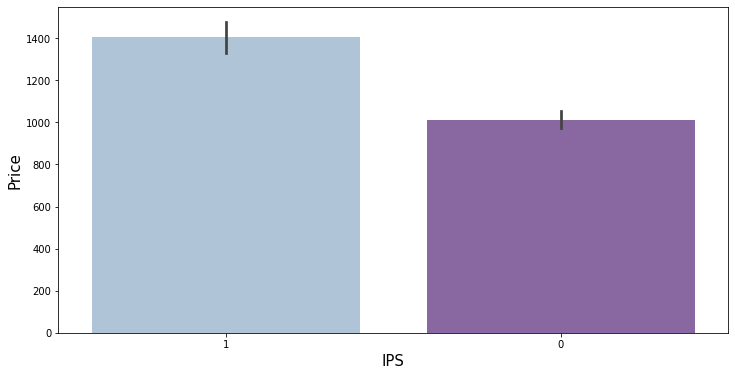

In [30]:
sort_bar1 = df.groupby(['Ips'])['Price_euros'].median().reset_index().sort_values('Price_euros', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=df['Ips'], 
            y=df['Price_euros'], 
            data=df, 
            palette='BuPu', 
            order=sort_bar1['Ips'])
plt.xlabel('IPS', size=15)
plt.ylabel('Price', size=15)
plt.show();

In [31]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [32]:
# Create a new column x_res & y_res
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [33]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res
751,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.84,1900.00,0,0,Full HD 1920,1080
795,Lenovo,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.42,2330.00,1,1,IPS Panel Touchscreen 2560,1440
664,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.70,1486.77,0,0,Full HD 1920,1080
385,Lenovo,Ultrabook,14.0,IPS Panel 2560x1440,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.13,2282.00,0,1,IPS Panel 2560,1440
598,Dell,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,1670.00,1,0,Full HD / Touchscreen 1920,1080


In [34]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [35]:
# Set the datatype as int32
df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')

In [36]:
# Gives the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price_euros       1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [37]:
# Checks the correlation related to price_euro column
df.corr()['Price_euros']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price_euros, dtype: float64

In [38]:
# Create a new column ppi
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [39]:
# Checks the correlation related to price_euro column
df.corr()['Price_euros']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price_euros, dtype: float64

In [40]:
# Drop the screen resolution column
df.drop(columns=['ScreenResolution'], inplace=True)

In [41]:
# checks the first 5 rows
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,226.983005


In [42]:
# Drop the inches, x_res & y_res column
df.drop(columns=['Inches', 'X_res', 'Y_res'], inplace=True)

In [43]:
# Checks the first 5 rows
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005


In [44]:
# check the count of the CPU column
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [45]:
# Create new column as CPU Name & apply the lambda function 
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [46]:
# Checks the first 5rows
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


In [47]:
# Function to fetch the processor name
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [48]:
# Create a new column as CPU Brand
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [49]:
# Checks the first 5 rows
df.head(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,Intel Core i5


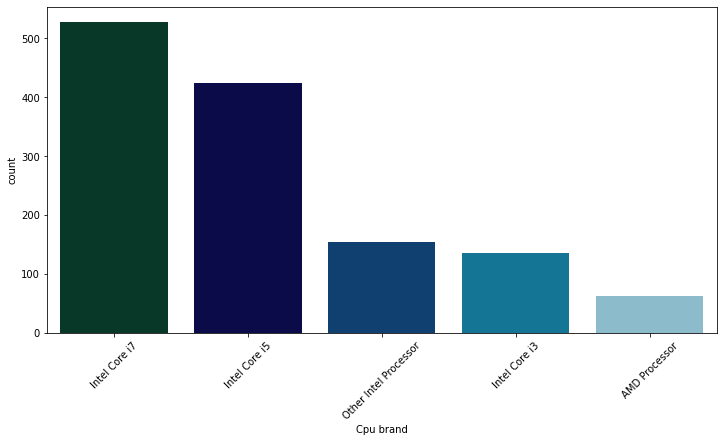

In [50]:
df['Cpu brand'].value_counts()
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.countplot(x=df['Cpu brand'], 
              data=df, 
              palette='ocean', 
              order=df['Cpu brand'].value_counts().index);

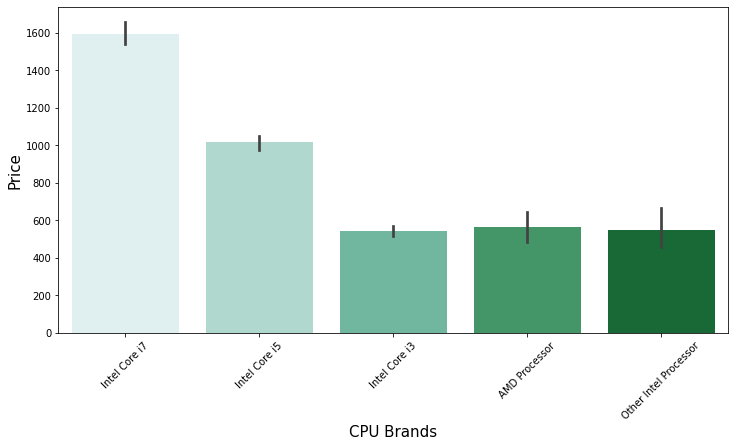

In [51]:
sort_bar2 = df.groupby(['Cpu brand'])['Price_euros'].median().reset_index().sort_values('Price_euros', ascending=False)
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.barplot(x=df['Cpu brand'], 
            y=df['Price_euros'], 
            data=df, 
            palette='BuGn', 
            order=sort_bar2['Cpu brand'])
plt.xlabel('CPU Brands', size=15)
plt.ylabel('Price', size=15)
plt.show();

In [52]:
# Drop the CPU & CPU name column
df.drop(columns=['Cpu', 'Cpu Name'], inplace=True)

In [53]:
# Checks the first 5rows
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


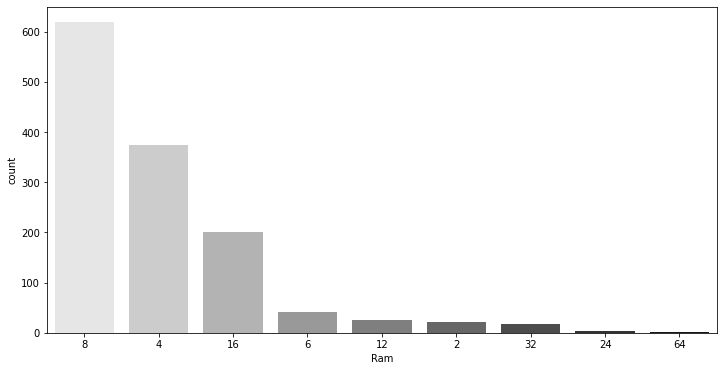

In [54]:
df['Ram'].value_counts()
plt.figure(figsize=(12,6))
plt.xticks(rotation='horizontal')
sns.countplot(x=df['Ram'], 
              data=df, 
              palette='binary', 
              order=df['Ram'].value_counts().index);

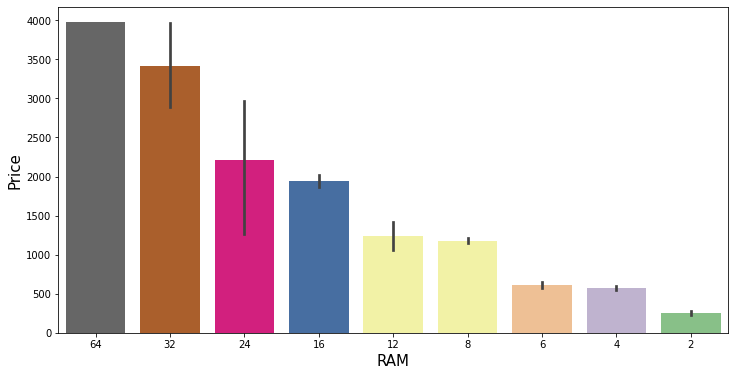

In [55]:
sort_bar3 = df.groupby(['Ram'])['Price_euros'].median().reset_index().sort_values('Price_euros', ascending=False)
plt.figure(figsize=(12,6))
plt.xticks(rotation='horizontal')
sns.barplot(x=df['Ram'], 
            y=df['Price_euros'], 
            data=df, 
            palette='Accent_r',
            order=sort_bar3['Ram'])
plt.xlabel('RAM', size=15)
plt.ylabel('Price', size=15)
plt.show();

In [56]:
# check the count of the Memory column
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [57]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

# Create a new column
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

# Drop the unnecessary column
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\yashg\AppData\Local\Temp\ipykernel_16288\4075101850.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\yashg\AppData\Local\Temp\ipykernel_16288\4075101850.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [58]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
1240,Lenovo,Notebook,6,256 SSD,AMD Radeon 530,Windows 10,2.20,597.57,0,0,141.211998,AMD Processor,0,256,0,0
100,HP,Notebook,8,256 SSD,AMD Radeon 530,Windows 10,1.91,719.00,0,0,141.211998,Intel Core i7,0,256,0,0
323,HP,Notebook,8,1000 HDD,Intel UHD Graphics 620,Windows 10,2.10,902.00,0,1,100.454670,Intel Core i7,1000,0,0,0
882,Asus,Notebook,4,32 Flash Storage,Intel HD Graphics 500,Windows 10,1.65,348.00,0,0,111.141337,Other Intel Processor,0,0,0,32
325,Lenovo,Notebook,4,32 Flash Storage,Intel HD Graphics 500,Windows 10,1.44,292.00,0,0,111.935204,Other Intel Processor,0,0,0,32


In [59]:
# Drop the memory column
df.drop(columns=['Memory'], inplace=True)

In [60]:
# checks the first 5rows
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0


In [61]:
# Check the Correlation related to price column 
df.corr()['Price_euros']

Ram              0.743007
Weight           0.210370
Price_euros      1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price_euros, dtype: float64

In [62]:
# Drop the Hybrid & Flash_storage column
df.drop(columns=['Hybrid', 'Flash_Storage'], inplace=True)

In [63]:
# Check the first 5rows 
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256


In [64]:
# check the count of the GPU column
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [65]:
# Create a new column as GPU Brand
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [66]:
# Check the first 5 rows
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel


In [67]:
# check the count of the GPU Brand column
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

In [68]:
# Create a new column 
df = df[df['Gpu Brand'] != 'ARM']

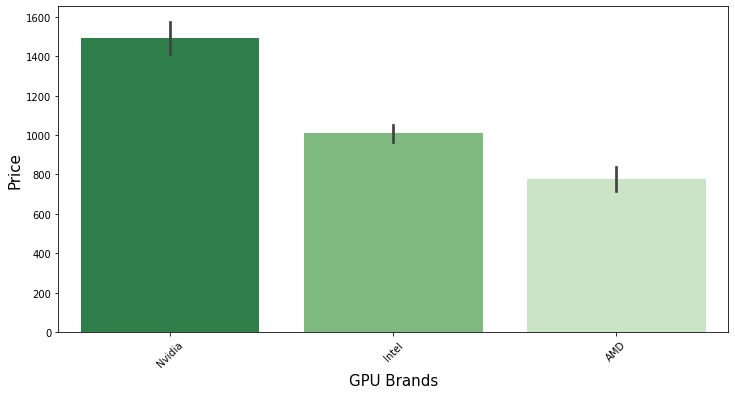

In [69]:
sort_bar4 = df.groupby(['Gpu Brand'])['Price_euros'].median().reset_index().sort_values('Price_euros', ascending=False)
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.barplot(x=df['Gpu Brand'], 
            y=df['Price_euros'], 
            data=df, 
            palette='Greens_r', 
            order=sort_bar4['Gpu Brand'])
plt.xlabel('GPU Brands', size=15)
plt.ylabel('Price', size=15)
plt.show();

In [70]:
# Drop the GPU column
df.drop(columns=['Gpu'], inplace=True)

In [71]:
# Check the first 5 rows
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel


In [72]:
# Check the Count of the Opsys column 
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

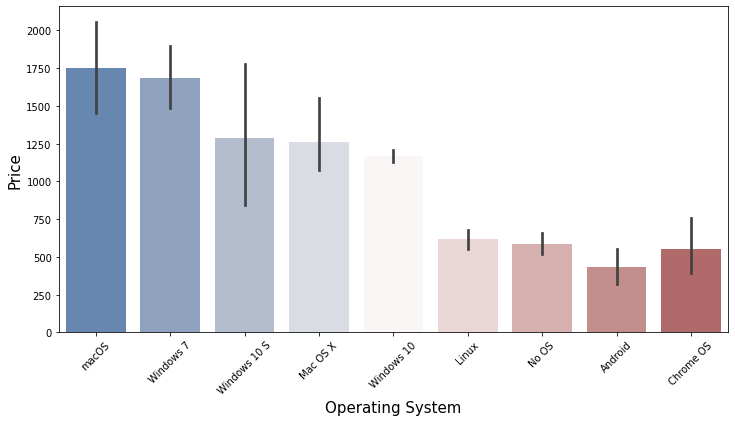

In [73]:
sort_bar5 = df.groupby(['OpSys'])['Price_euros'].median().reset_index().sort_values('Price_euros', ascending=False)
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.barplot(x=df['OpSys'], 
            y=df['Price_euros'], 
            data=df, 
            palette='vlag', 
            order=sort_bar5['OpSys'])
plt.xlabel('Operating System', size=15)
plt.ylabel('Price', size=15)
plt.show();

In [74]:
# Function to fetch the operating system
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOs' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [75]:
# Create a new column as OS & apply cat_os function on it
df['os'] = df['OpSys'].apply(cat_os)

In [76]:
# Check the first 5 rows
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Others/No OS/Linux
1,Apple,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Others/No OS/Linux
2,HP,Notebook,8,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Others/No OS/Linux
4,Apple,Ultrabook,8,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Others/No OS/Linux


In [77]:
# Drop the opsys function
df.drop(columns=['OpSys'], inplace=True)

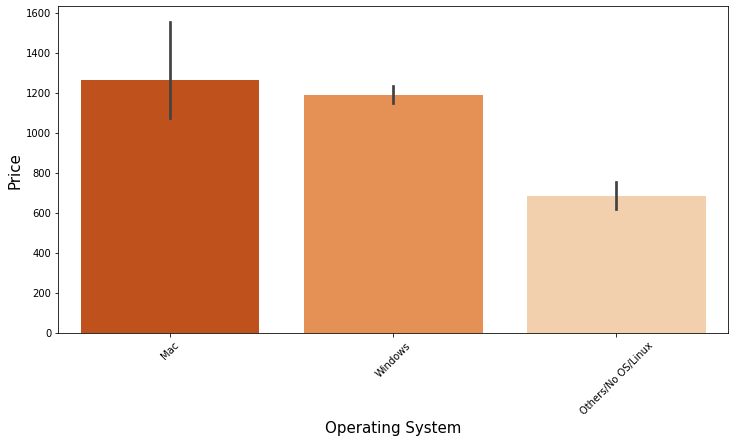

In [78]:
sort_bar6 = df.groupby(['os'])['Price_euros'].median().reset_index().sort_values('Price_euros', ascending=False)
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.barplot(x=df['os'], 
            y=df['Price_euros'], 
            data=df, 
            palette='Oranges_r', 
            order=sort_bar6['os'])
plt.xlabel('Operating System', size=15)
plt.ylabel('Price', size=15)
plt.show();

In [79]:
# Check the Count of the Weight column
df['Weight'].value_counts()

2.20    126
2.10     58
2.00     45
2.40     44
2.30     41
       ... 
4.50      1
1.14      1
3.80      1
2.26      1
2.34      1
Name: Weight, Length: 171, dtype: int64

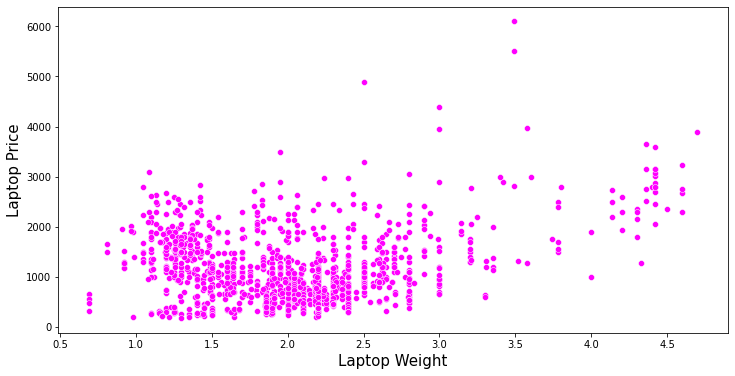

In [80]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Weight'], 
                y=df['Price_euros'], 
                data=df, 
                color='magenta', 
                markers=['*']);
plt.xlabel('Laptop Weight', size=15)
plt.ylabel('Laptop Price', size=15)
plt.show();

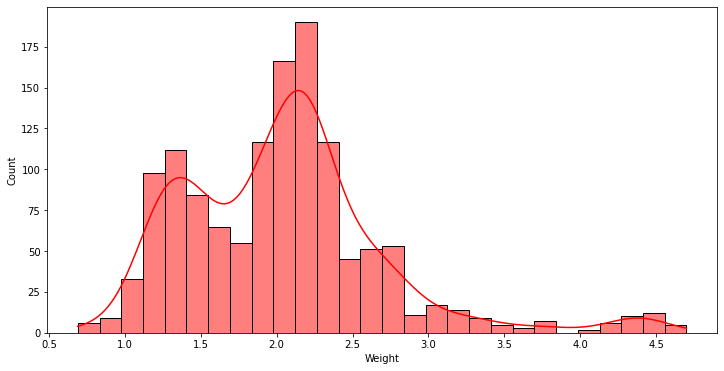

In [81]:
plt.figure(figsize=(12,6))
sns.histplot(df['Weight'], 
             kde=True, 
             fill=True, 
             color='r');

In [82]:
# Check the correlation related to price column
df.corr()['Price_euros']

Ram            0.742905
Weight         0.209867
Price_euros    1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price_euros, dtype: float64

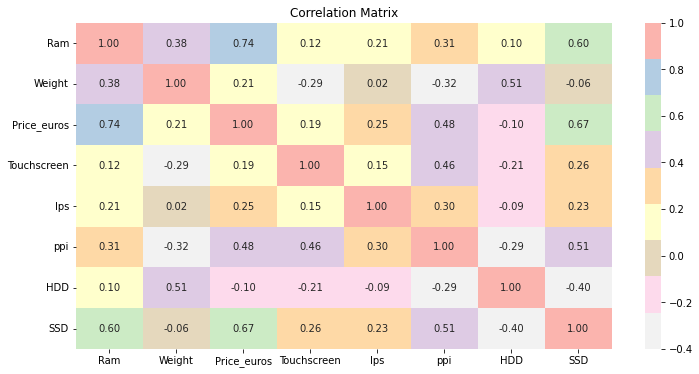

In [83]:
# Create heatmap
plt.figure(figsize=(12,6))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(), 
            annot=True, 
            cbar=True, 
            cmap='Pastel1_r', 
            fmt='.2f');

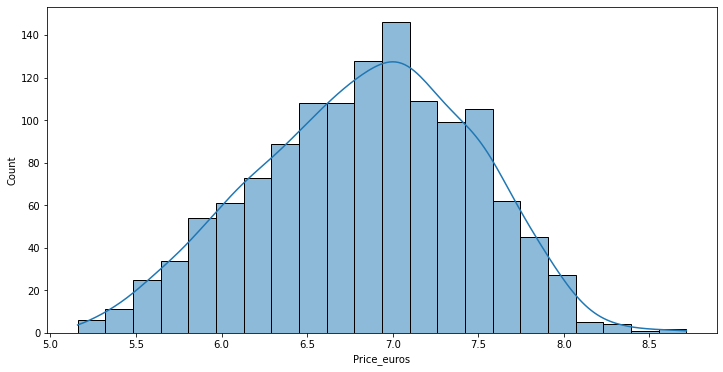

In [84]:
log_price = np.log(df['Price_euros'])
plt.figure(figsize=(12,6))
sns.histplot(x=log_price, kde=True);

### Insight's From Analysis 

##### 1. Razer laptop is the most expensive followed by LG.
##### 2. Workstation type laptop are very expensive followed by ultrabook & gaming laptop.
##### 3. Laptop screen with 18.4 & 15.4inches are very expensive.
##### 4. Touchscreen laptop's are very expensive as compare to non-touchscreen laptop's.
##### 5. Laptop with IPS/ScreenResolution are very expensive.
##### 6. Intel corei7 processor are very expensive followed by intel corei5.
##### 7. 64 GB RAM Variant laptop's are very expensive followed by 32GB variant.
##### 8. Nvidia GPU are very expensive.
##### 9. Mac OperatingSystem laptop's are very expensive.
##### 10. Heavy Laptop's are very expensive.

### Seprating Independent & Dependent Features

In [85]:
# Create X-varaible as independent and Y-variable as Dependent Feature
X = df.drop(columns=['Price_euros'])
Y = np.log(df['Price_euros'])

In [86]:
# Checks the first 5rows
X.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Others/No OS/Linux
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Others/No OS/Linux
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Others/No OS/Linux
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Others/No OS/Linux


In [87]:
# Checks the first 5rows
Y.head()

0    7.200194
1    6.801216
2    6.354370
3    7.838915
4    7.497540
Name: Price_euros, dtype: float64

## Train-Test_split

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
# Train_Test_Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=2)

In [90]:
# Checks the X_train & X_test shape
print('X Shape : ', X.shape)
print('X_train_Shape : ', X_train.shape)
print('X_test_Shape : ', X_test.shape)

X Shape :  (1302, 12)
X_train_Shape :  (1106, 12)
X_test_Shape :  (196, 12)


In [91]:
# Checks the Y_train & Y_test shape
print('Y_Shape : ', Y.shape)
print('Y_train_Shape : ', Y_train.shape)
print('Y_test_Shape : ', Y_test.shape)

Y_Shape :  (1302,)
Y_train_Shape :  (1106,)
Y_test_Shape :  (196,)


In [92]:
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [93]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

### Model Building With Different Regression Techniques.


## Linear Regression

In [94]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])
pipe.fit(X_train, Y_train)
prediction = pipe.predict(X_test)

print('r2_score :', r2_score(Y_test, prediction))
print('MAE :', mean_absolute_error(Y_test, prediction))

r2_score : 0.8074747226284256
MAE : 0.20953298603048753


## Lasso Regression

In [95]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])
pipe.fit(X_train, Y_train)
prediction = pipe.predict(X_test)

print('r2_score :', r2_score(Y_test, prediction))
print('MAE :', mean_absolute_error(Y_test, prediction))

r2_score : 0.8068842224407048
MAE : 0.211260129546456


## Ridge Regression

In [96]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])
pipe.fit(X_train, Y_train)
prediction = pipe.predict(X_test)

print('r2_score :', r2_score(Y_test, prediction))
print('MAE :', mean_absolute_error(Y_test, prediction))

r2_score : 0.8123566807797893
MAE : 0.20989036127092292


## K Nearest Neighbors

In [97]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])
pipe.fit(X_train, Y_train)
prediction = pipe.predict(X_test)

print('r2_score :', r2_score(Y_test, prediction))
print('MAE :', mean_absolute_error(Y_test, prediction))

r2_score : 0.8021984604448553
MAE : 0.193197167215211


## Decision Tree Regressor

In [98]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])
pipe.fit(X_train, Y_train)
prediction = pipe.predict(X_test)

print('r2_score :', r2_score(Y_test, prediction))
print('MAE :', mean_absolute_error(Y_test, prediction))

r2_score : 0.8433007811643811
MAE : 0.18075097903792622


## Support Vector Machine(SVM)

In [99]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])
pipe.fit(X_train, Y_train)
prediction = pipe.predict(X_test)

print('r2_score :', r2_score(Y_test, prediction))
print('MAE :', mean_absolute_error(Y_test, prediction))

r2_score : 0.8068761990813582
MAE : 0.20267613811666124


## Random Forest

In [100]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                             max_samples=0.5, 
                             random_state=2,
                             max_features=0.75,
                             max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])
pipe.fit(X_train, Y_train)
prediction = pipe.predict(X_test)

print('r2_score :', r2_score(Y_test, prediction))
print('MAE :', mean_absolute_error(Y_test, prediction))

r2_score : 0.8876986941462663
MAE : 0.15894725646605792


## Extra Trees

In [101]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                           max_depth=15,
                           random_state=3,
                           max_samples=0.5,
                           max_features=0.75,
                           bootstrap=True)

pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])
pipe.fit(X_train, Y_train)
prediction = pipe.predict(X_test)

print('r2_score :', r2_score(Y_test, prediction))
print('MAE :', mean_absolute_error(Y_test, prediction))

r2_score : 0.8902130662434273
MAE : 0.1577974295671131


## Ada Boost

In [102]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=100, learning_rate=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])
pipe.fit(X_train, Y_train)
prediction = pipe.predict(X_test)

print('r2_score :', r2_score(Y_test, prediction))
print('MAE :', mean_absolute_error(Y_test, prediction))

r2_score : 0.7969504448688765
MAE : 0.2296653051209314


## Gradient Boosting

In [103]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=200)

pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])
pipe.fit(X_train, Y_train)
prediction = pipe.predict(X_test)

print('r2_score :', r2_score(Y_test, prediction))
print('MAE :', mean_absolute_error(Y_test, prediction))

r2_score : 0.8824973775166629
MAE : 0.16350726213358605


In [104]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))